In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

---

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df_diabetes_data = pd.read_csv("../Resources/diabetes_012_health_indicators_BRFSS2015.csv")
print(df_diabetes_data.shape)

# Review the DataFrame
df_diabetes_data.head()

(253680, 22)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# Examine datatypes
df_diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
# Examine the statistics of 'df_diabetes_data'
print(df_diabetes_data.shape)
df_diabetes_data.describe()

(253680, 22)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
# Check for class imbalance in the 'Diabetes_012' column
df_diabetes_data.Diabetes_012.value_counts()

# zero = no diabetes
# one = pre diabetic
# two = yes diabetes
# there is a significant class imbalance (this could cause a classification model to become biased towards predicting the majority class) 

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [6]:
# Create binary dataset for Diabetes vs. No diabetes
# combine prediabetics with diabetics

# Make copy of 'df_diabetes_data'
df_diabetes_data_binary = df_diabetes_data

# Change diabetics from 2 to 1, so that 0 is non-diabetic and 1 is pre-diabetic and diabetic
df_diabetes_data_binary['Diabetes_012'] = df_diabetes_data_binary['Diabetes_012'].replace({2:1})

# Change column name to 'Diabetes_binary'
df_diabetes_data_binary = df_diabetes_data_binary.rename(columns = {'Diabetes_012': 'Diabetes_binary'})
df_diabetes_data_binary.Diabetes_binary.unique()

array([0., 1.])

In [7]:
# Show the change
df_diabetes_data_binary.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [8]:
# Show class sizes
df_diabetes_data_binary.Diabetes_binary.value_counts()

Diabetes_binary
0.0    213703
1.0     39977
Name: count, dtype: int64

In [9]:
# Examine correlation
corrs = df_diabetes_data_binary.corr()
corrs

# correlation measures strength/direction of linear relationship between two variables (resulting in correlation matrix)
# coefficient of 1 indicates perfect positive correlation (one variable increases, the other variable also increases)
# coefficient of -1 indicates perfect negative correlation (one variable increases, the other variable decreases)
# coefficient of 0 indicates no correlation

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.270334,0.210290,0.067879,0.223851,0.062778,0.104800,0.176933,-0.121392,-0.042088,-0.059219,-0.056682,0.014079,0.038025,0.300785,0.074971,0.174948,0.222155,0.029606,0.185891,-0.131803,-0.172794
HighBP,0.270334,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.210290,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.067879,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.223851,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.062778,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,-0.030678,0.101619,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.104800,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,-0.041124,-0.016950,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.176933,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,-0.039167,-0.028991,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.121392,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,0.153150,0.012392,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.042088,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,0.254342,-0.035288,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


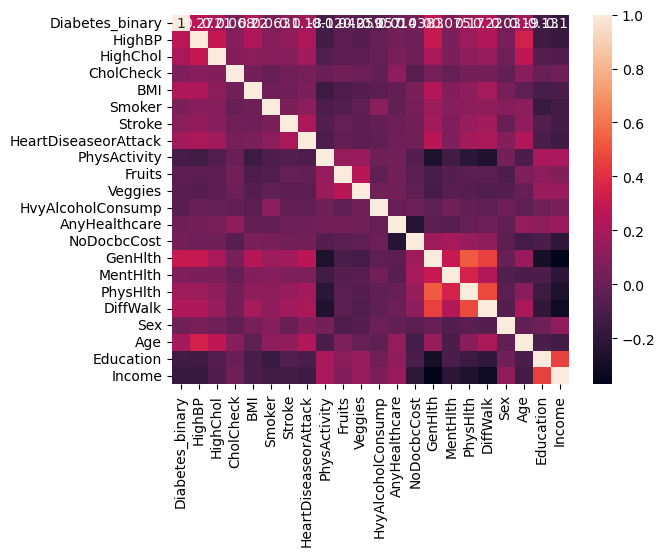

In [10]:
# Visualize correlation 
sns.heatmap(corrs, annot=True)
plt.show()

In [11]:
# Top predictive features
abs(corrs.Diabetes_binary).sort_values(ascending=False)

Diabetes_binary         1.000000
GenHlth                 0.300785
HighBP                  0.270334
BMI                     0.223851
DiffWalk                0.222155
HighChol                0.210290
Age                     0.185891
HeartDiseaseorAttack    0.176933
PhysHlth                0.174948
Income                  0.172794
Education               0.131803
PhysActivity            0.121392
Stroke                  0.104800
MentHlth                0.074971
CholCheck               0.067879
Smoker                  0.062778
Veggies                 0.059219
HvyAlcoholConsump       0.056682
Fruits                  0.042088
NoDocbcCost             0.038025
Sex                     0.029606
AnyHealthcare           0.014079
Name: Diabetes_binary, dtype: float64

In [12]:
# Gather column names 
df_diabetes_data_binary.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [13]:
# Define features
features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']

In [14]:
# SCALE the NUMERIC features FIRST
# Subset the DataFrame
df_diabetes_data_binary_sub = df_diabetes_data_binary.loc[:, features]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the Scaler
scaler.fit(df_diabetes_data_binary_sub)

# Predict/Transform the data
scaled_data = scaler.transform(df_diabetes_data_binary_sub)
df_diabetes_data_binary_scaled = pd.DataFrame(scaled_data, columns=features)

# Display the Scaled Data
df_diabetes_data_binary_scaled.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.153688,1.165254,0.196922,1.757936,1.120927,-0.205637,-0.322458,-1.762814,-1.316872,0.482087,-0.244014,0.226863,-0.303173,2.329121,1.998592,1.233999,2.223615,-0.887021,0.316900,-1.065595,-1.474487
1,-0.866785,-0.858182,-5.078164,-0.511806,1.120927,-0.205637,-0.322458,0.567275,-1.316872,-2.074316,-0.244014,-4.407954,3.298445,0.457294,-0.429630,-0.486592,-0.449718,-0.887021,-0.337933,0.963272,-2.440138
2,1.153688,1.165254,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,-2.074316,-0.244014,0.226863,3.298445,2.329121,3.617407,2.954590,2.223615,-0.887021,0.316900,-1.065595,0.939638
3,1.153688,-0.858182,0.196922,-0.209174,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,-0.244014,0.226863,-0.303173,-0.478619,-0.429630,-0.486592,-0.449718,-0.887021,0.971733,-2.080028,-0.026012
4,1.153688,1.165254,0.196922,-0.663122,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,-0.244014,0.226863,-0.303173,-0.478619,-0.024926,-0.486592,-0.449718,-0.887021,0.971733,-0.051162,-0.991662


In [15]:
# Show that the data has been normalized
# goal of data normalization is to achieve a standardized data format
df_diabetes_data_binary_scaled.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05,2.536800e+05
mean,-1.250340e-16,5.769939e-17,1.245859e-16,-2.505162e-16,2.688903e-17,-4.033355e-18,4.257430e-18,5.377807e-17,5.601882e-17,-2.487236e-17,9.299124e-17,4.481506e-17,-1.792602e-17,1.711935e-16,8.963011e-18,3.450759e-17,2.554458e-17,1.299637e-16,6.767074e-17,-8.514861e-17,7.170409e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-8.667854e-01,-8.581816e-01,-5.078164e+00,-2.478916e+00,-8.921186e-01,-2.056365e-01,-3.224576e-01,-1.762814e+00,-1.316872e+00,-2.074316e+00,-2.440141e-01,-4.407954e+00,-3.031731e-01,-1.414532e+00,-4.296296e-01,-4.865924e-01,-4.497181e-01,-8.870209e-01,-2.302431e+00,-4.108894e+00,-2.440138e+00
25%,-8.667854e-01,-8.581816e-01,1.969216e-01,-6.631223e-01,-8.921186e-01,-2.056365e-01,-3.224576e-01,5.672748e-01,-1.316872e+00,4.820866e-01,-2.440141e-01,2.268626e-01,-3.031731e-01,-4.786188e-01,-4.296296e-01,-4.865924e-01,-4.497181e-01,-8.870209e-01,-6.653492e-01,-1.065595e+00,-5.088373e-01
50%,-8.667854e-01,-8.581816e-01,1.969216e-01,-2.091739e-01,-8.921186e-01,-2.056365e-01,-3.224576e-01,5.672748e-01,7.593754e-01,4.820866e-01,-2.440141e-01,2.268626e-01,-3.031731e-01,-4.786188e-01,-4.296296e-01,-4.865924e-01,-4.497181e-01,-8.870209e-01,-1.051636e-02,-5.116153e-02,4.568129e-01
75%,1.153688e+00,1.165254e+00,1.969216e-01,3.960906e-01,1.120927e+00,-2.056365e-01,-3.224576e-01,5.672748e-01,7.593754e-01,4.820866e-01,-2.440141e-01,2.268626e-01,-3.031731e-01,4.572943e-01,-1.598272e-01,-1.424742e-01,-4.497181e-01,1.127369e+00,6.443165e-01,9.632716e-01,9.396380e-01
max,1.153688e+00,1.165254e+00,1.969216e-01,1.053427e+01,1.120927e+00,4.862949e+00,3.101183e+00,5.672748e-01,7.593754e-01,4.820866e-01,4.098123e+00,2.268626e-01,3.298445e+00,2.329121e+00,3.617407e+00,2.954590e+00,2.223615e+00,1.127369e+00,1.626566e+00,9.632716e-01,9.396380e-01


In [16]:
# Separate the data into labels (target variable) and features (model inputs)

# Separate the y variable, the labels
y = df_diabetes_data_binary.Diabetes_binary

# Separate the X variable, the features
features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']
X = df_diabetes_data_binary.loc[:, features]

In [17]:
# Review the y variable Series
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    1.0
253677    0.0
253678    0.0
253679    1.0
Name: Diabetes_binary, Length: 253680, dtype: float64

In [18]:
# Review the X variable DataFrame
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [19]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

# features (X) and labels (y) were split into datasets of 25% for training and 75% for testing
# same proportion of the target classes ('Diabetes_binary') in both the training and testing sets

---

In [20]:
# Function for Classification for ALL models
def doClassification(model, X_train, X_test, y_train, y_test):
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics for TRAIN group
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    print(train_results)

    # Generate metrics for TEST group
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    # Set figure size
    plt.figure(figsize=(6, 6))
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    # Display the plot
    plt.show()

### Create a logistic regression model 

TRAIN METRICS
    Confusion Matrix: 
    [[156753   3524]
 [ 25736   4247]]
    
    AUC: 0.805220032978497

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.86      0.98      0.91    160277
         1.0       0.55      0.14      0.22     29983

    accuracy                           0.85    190260
   macro avg       0.70      0.56      0.57    190260
weighted avg       0.81      0.85      0.81    190260

    
TEST METRICS
    Confusion Matrix: 
    [[52237  1189]
 [ 8560  1434]]
    
    AUC: 0.8055117332743823

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     53426
         1.0       0.55      0.14      0.23      9994

    accuracy                           0.85     63420
   macro avg       0.70      0.56      0.57     63420
weighted avg       0.81      0.85      0.81     63420

    


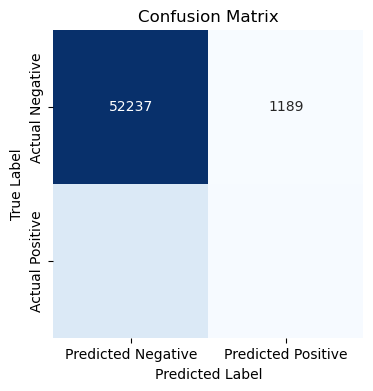

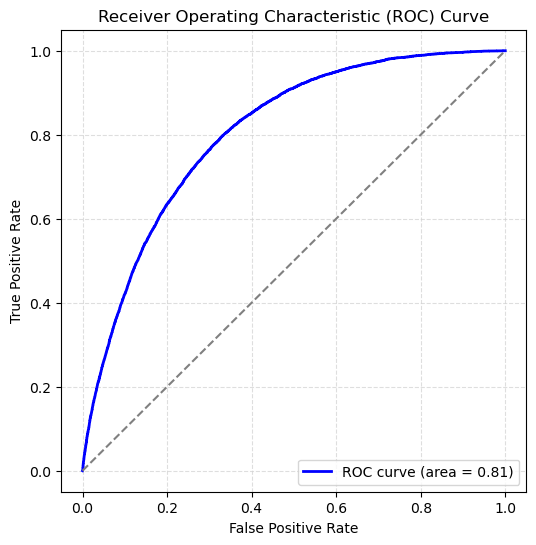

In [21]:
# Instantiate the Logistic Regression model
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

### Create a random forest model for comparison

TRAIN METRICS
    Confusion Matrix: 
    [[160145    132]
 [  1090  28893]]
    
    AUC: 0.9992879247182631

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    160277
         1.0       1.00      0.96      0.98     29983

    accuracy                           0.99    190260
   macro avg       0.99      0.98      0.99    190260
weighted avg       0.99      0.99      0.99    190260

    
TEST METRICS
    Confusion Matrix: 
    [[51355  2071]
 [ 7973  2021]]
    
    AUC: 0.7935955879670878

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     53426
         1.0       0.49      0.20      0.29      9994

    accuracy                           0.84     63420
   macro avg       0.68      0.58      0.60     63420
weighted avg       0.81      0.84      0.81     63420

    


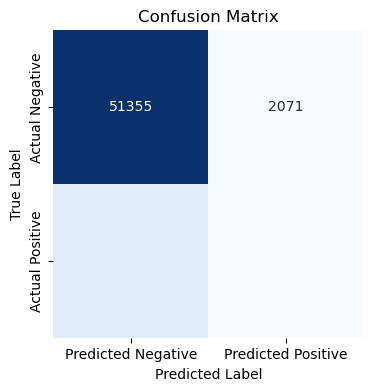

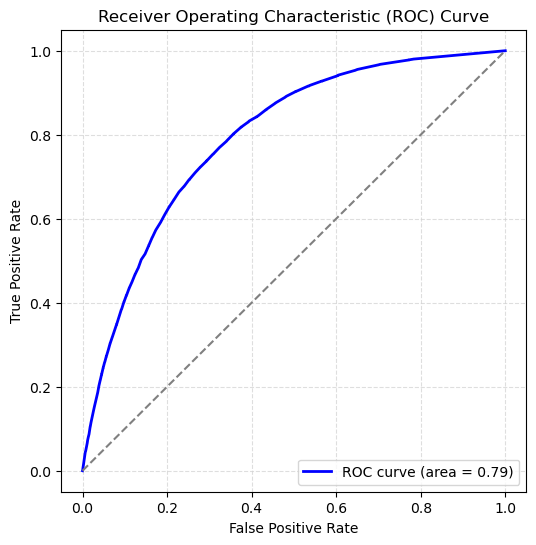

In [22]:
# Instantiate the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

### Create a Support Vector model for comparison

TRAIN METRICS
    Confusion Matrix: 
    [[160145    132]
 [  1090  28893]]
    
    AUC: 0.9992879247182631

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    160277
         1.0       1.00      0.96      0.98     29983

    accuracy                           0.99    190260
   macro avg       0.99      0.98      0.99    190260
weighted avg       0.99      0.99      0.99    190260

    
TEST METRICS
    Confusion Matrix: 
    [[51355  2071]
 [ 7973  2021]]
    
    AUC: 0.7935955879670878

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     53426
         1.0       0.49      0.20      0.29      9994

    accuracy                           0.84     63420
   macro avg       0.68      0.58      0.60     63420
weighted avg       0.81      0.84      0.81     63420

    


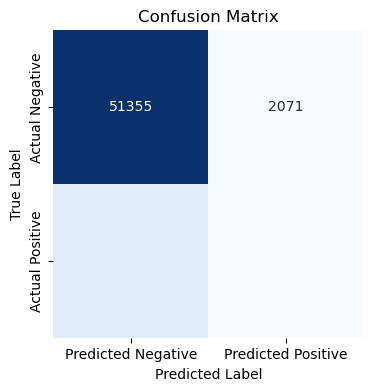

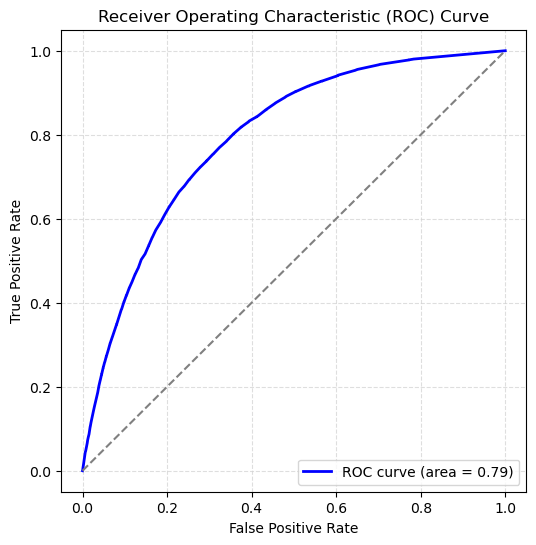

In [23]:
# Instantiate the Support Vector model
svc = SVC(probability=True)

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

### Create an Extra Trees model for comparison

TRAIN METRICS
    Confusion Matrix: 
    [[160145    132]
 [  1090  28893]]
    
    AUC: 0.9992879247182631

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    160277
         1.0       1.00      0.96      0.98     29983

    accuracy                           0.99    190260
   macro avg       0.99      0.98      0.99    190260
weighted avg       0.99      0.99      0.99    190260

    
TEST METRICS
    Confusion Matrix: 
    [[51355  2071]
 [ 7973  2021]]
    
    AUC: 0.7935955879670878

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     53426
         1.0       0.49      0.20      0.29      9994

    accuracy                           0.84     63420
   macro avg       0.68      0.58      0.60     63420
weighted avg       0.81      0.84      0.81     63420

    


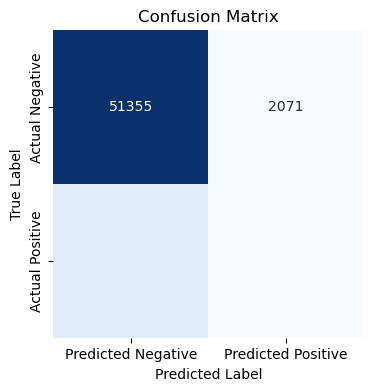

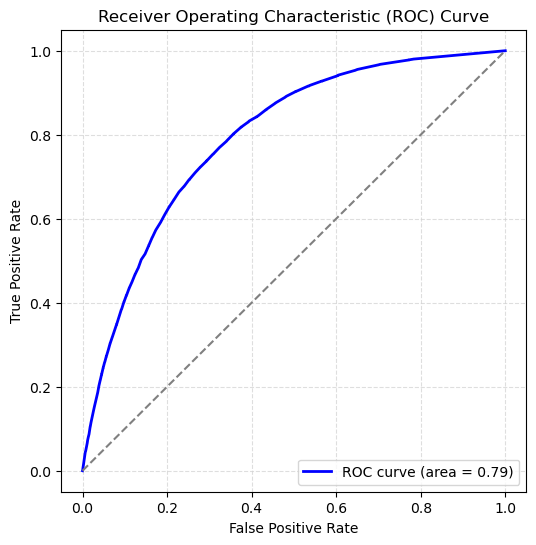

In [24]:
# Instantiate the Extra Trees model
et = ExtraTreesClassifier(random_state=42)

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

###  Create an Gradient Boosting model for comparison

TRAIN METRICS
    Confusion Matrix: 
    [[155797   4480]
 [ 23669   6314]]
    
    AUC: 0.8263504488073813

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.87      0.97      0.92    160277
         1.0       0.58      0.21      0.31     29983

    accuracy                           0.85    190260
   macro avg       0.73      0.59      0.61    190260
weighted avg       0.82      0.85      0.82    190260

    
TEST METRICS
    Confusion Matrix: 
    [[51898  1528]
 [ 7912  2082]]
    
    AUC: 0.8262649940130664

    Classification Report:
                  precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     53426
         1.0       0.58      0.21      0.31      9994

    accuracy                           0.85     63420
   macro avg       0.72      0.59      0.61     63420
weighted avg       0.82      0.85      0.82     63420

    


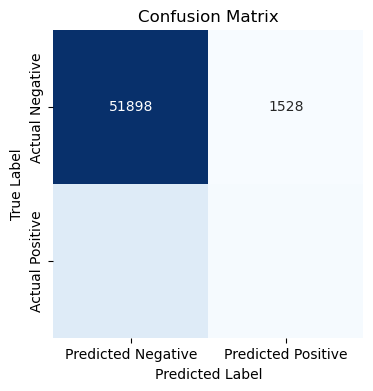

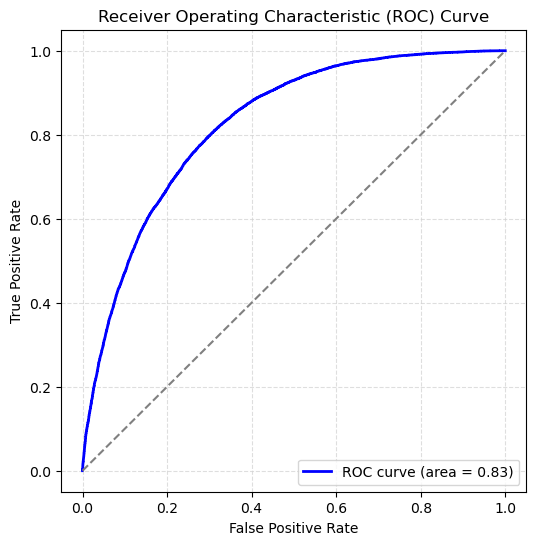

In [25]:
# Instantiate the Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

### Cross validate all your models

In [28]:
# Perform a cross-validation process on ALL models to verify their reliability across different subsets of the dataset
# The number of folds determines the test/train split for each iteration
# Perform 5-fold cross-validation with roc_auc scoring
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(lr, X, y, cv=cv, scoring='roc_auc')
# uses 5 different mutually exclusive testing/training splits 

# Print 'scores' to see array of individual iteration scores
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores):.3f}")

Cross-validation AUC scores: [0.80266217 0.79807271 0.80923404 0.80851331 0.81123609]
Mean AUC: 0.806


In [29]:
# Perform 5-fold cross-validation with roc_auc scoring
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc')
# uses 5 different mutually exclusive testing/training splits 

# Print 'scores' to see array of individual iteration scores
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores):.3f}")

Cross-validation AUC scores: [0.78887358 0.78747055 0.79688362 0.79143647 0.79689376]
Mean AUC: 0.792


---